In [31]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [9]:
def display(img, cmap='gray'):
    # fig = plt.figure(figsize=(11.69,8.27)) # A4 사이즈
    fig = plt.figure(figsize=(16.53, 11.69))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [41]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

In [10]:
# Tesing the neural network with images
loaded_network = load_model('network')

In [11]:
loaded_network

In [12]:
loaded_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

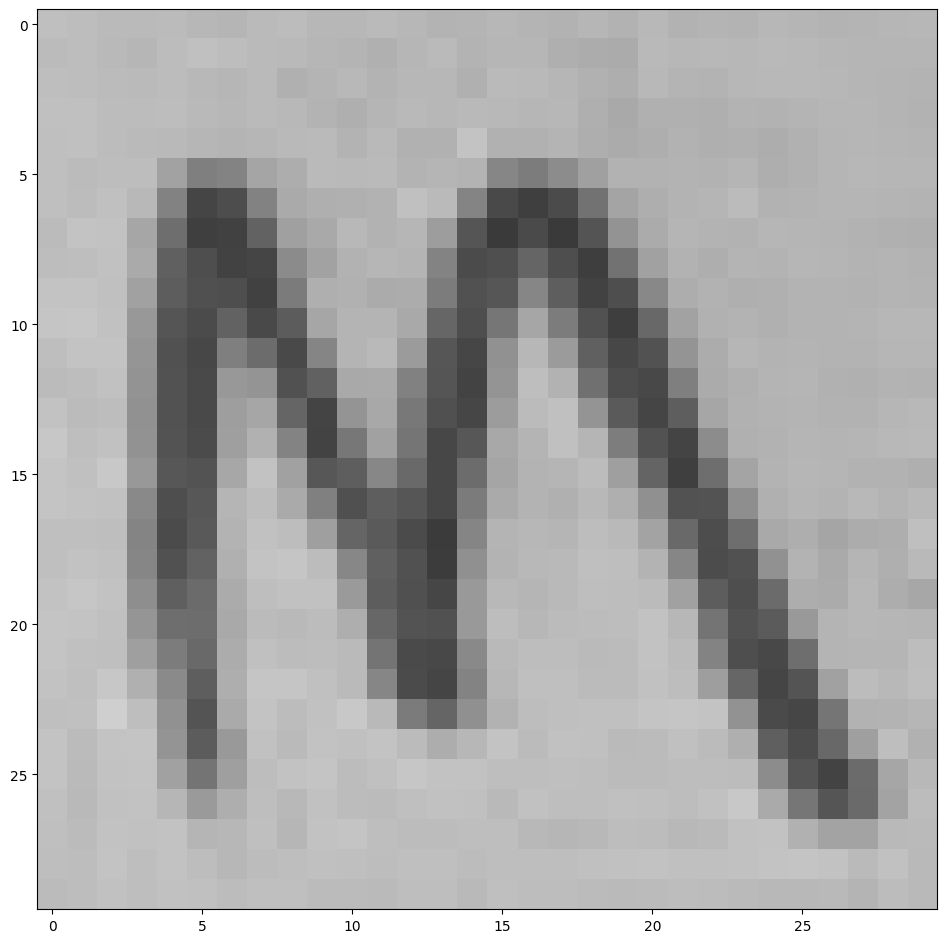

In [13]:
img = cv2.imread('./OCR_with_Python/Images/letter-m.jpg')
display(img)

In [14]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
print(gray_img.shape)

(30, 30, 3)
(30, 30)


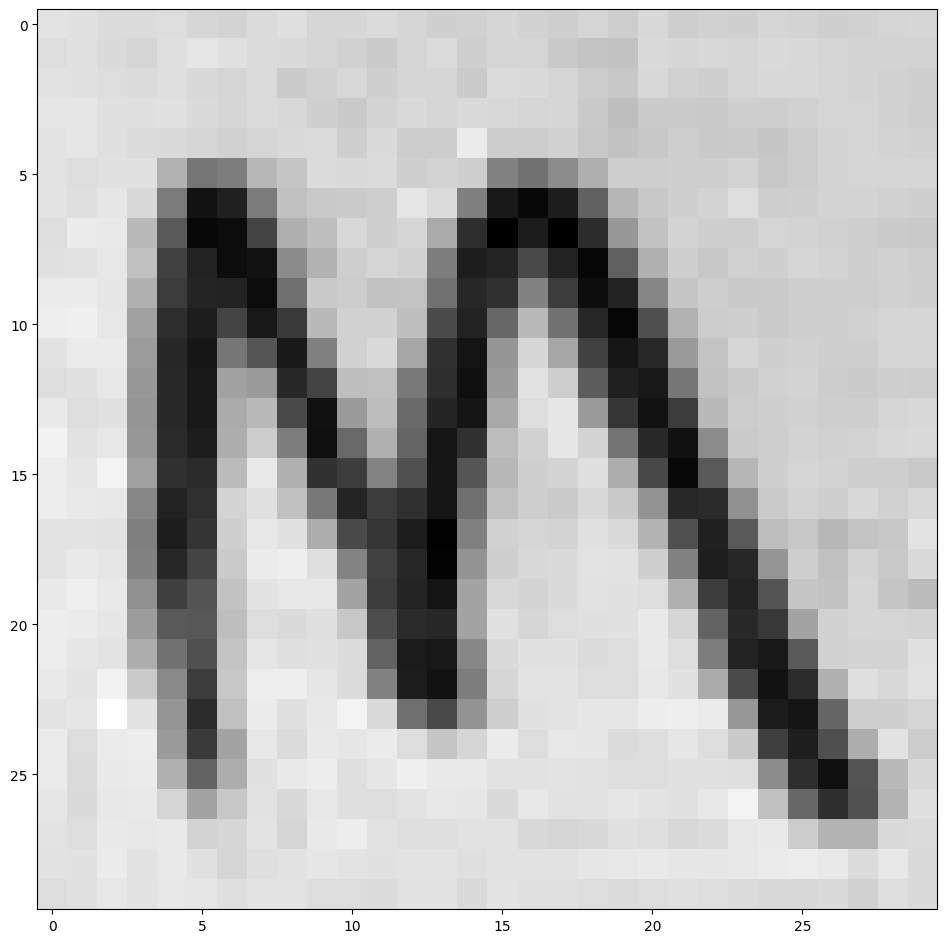

In [15]:
display(gray_img)

137.0


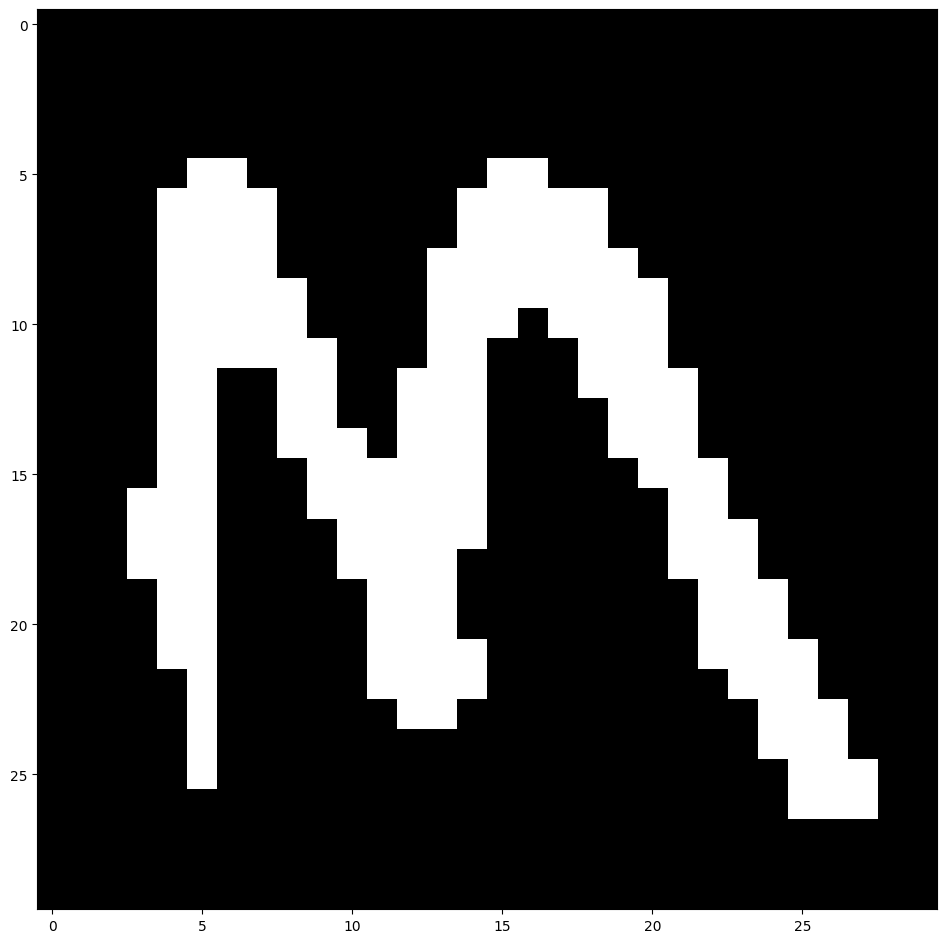

In [18]:
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

print(value)
display(thresh)

In [19]:
thresh.shape

(30, 30)

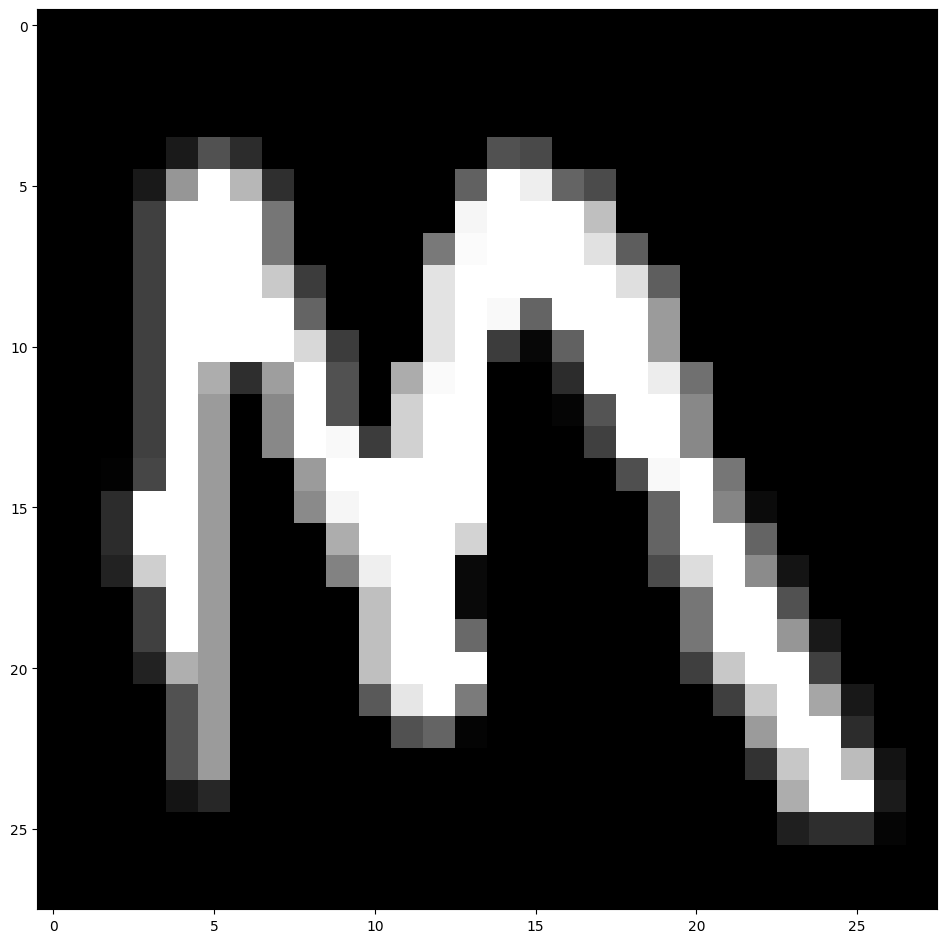

In [28]:
img = cv2.resize(thresh, (28, 28))
display(img)

In [29]:
print(img.astype('float32'))

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  26.  82.  44.   0.   0.   0.   0.   0.   0.   0.
   82.  73.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  25. 150. 255. 183.  47.   0.   0.   0.   0.   0.  97.
  255. 238. 100.  75.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  64. 255. 255. 255. 118.   0.   0.   0.   0.   0. 246.
  255. 255. 255. 191.   0.   0.   0.   0.   0.   0.   0.  

In [30]:
img = img.astype('float32') / 255.0
print(img)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [32]:
img = np.expand_dims(img, axis=-1)

(28, 28, 1)


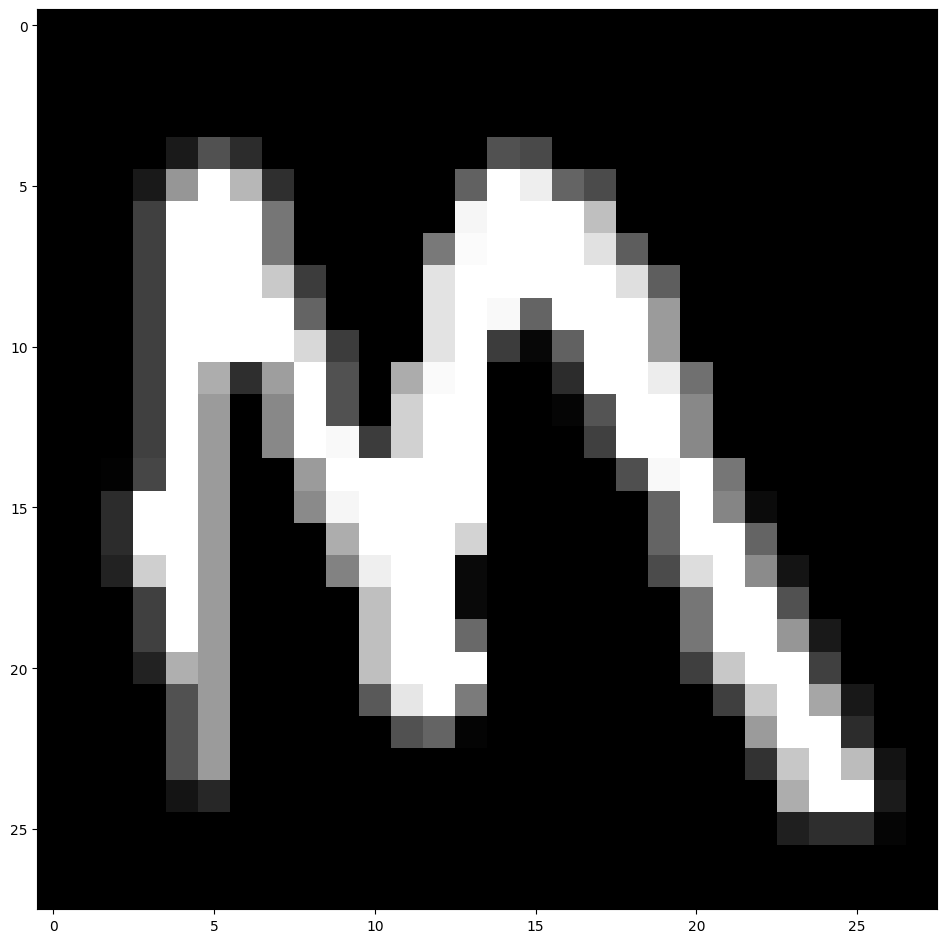

In [35]:
print(img.shape)
display(img)

In [36]:
img = np.reshape(img, (1, 28, 28, 1))
img.shape

(1, 28, 28, 1)

In [38]:
prediction = loaded_network.predict(img)
prediction

1/1 [==============================] - 0s 173ms/step


array([[8.0297572e-21, 1.1321414e-17, 3.8300251e-19, 1.1147844e-18,
        3.4317396e-11, 7.5610173e-18, 8.5138122e-23, 6.8134234e-11,
        9.5193171e-23, 8.8040824e-19, 5.5475236e-10, 3.3855912e-16,
        4.2729386e-15, 2.7909695e-11, 5.0440804e-13, 1.9017726e-27,
        2.1696142e-13, 7.8096107e-09, 5.4703305e-28, 9.0479558e-14,
        1.4092889e-11, 1.6159685e-17, 9.9999690e-01, 3.0433546e-06,
        2.4325677e-15, 4.0419193e-19, 1.0601293e-18, 9.0091885e-11,
        1.5503702e-13, 1.0394597e-11, 2.4751203e-11, 1.1946539e-24,
        4.2338724e-09, 2.5338144e-16, 4.8198894e-15, 1.0984671e-21]],
      dtype=float32)

In [39]:
np.argmax(prediction)

22

In [42]:
name_labels[np.argmax(prediction)]

'M'

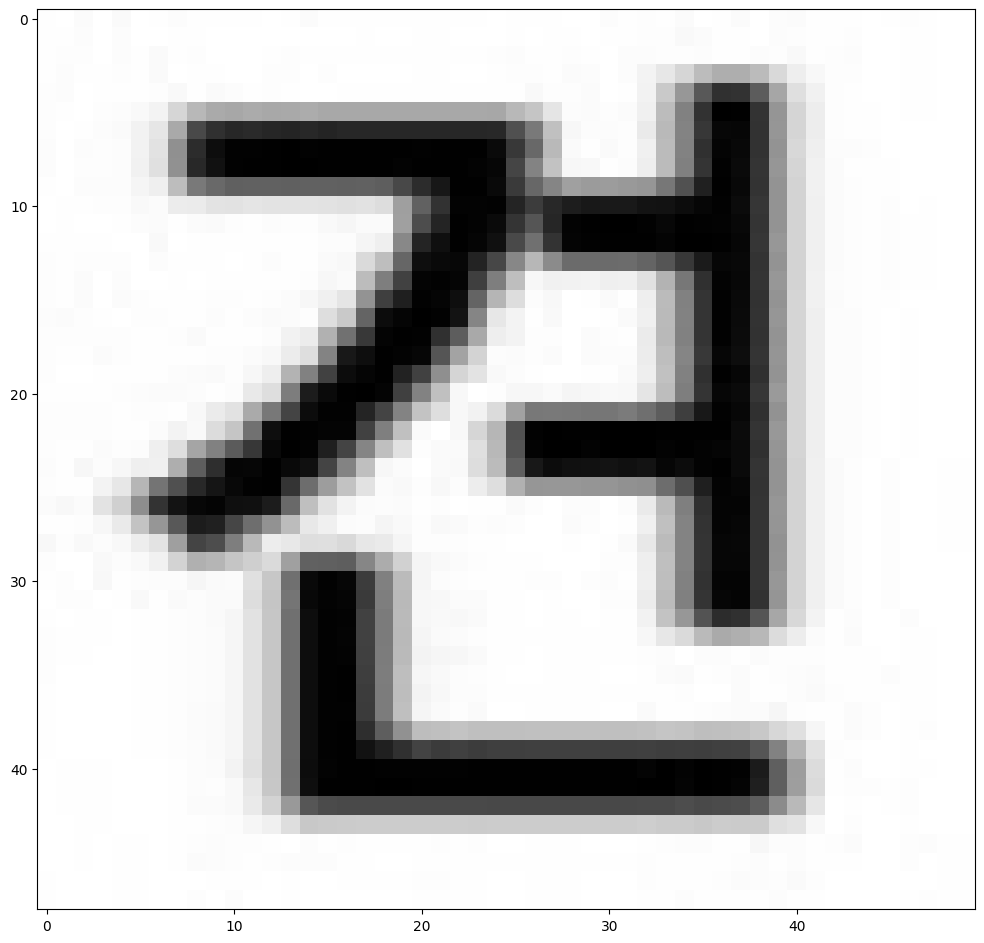

In [43]:
kor_img = cv2.imread('./OCR_with_Python/Images/kor_char.jpg')
kor_img_gray = cv2.cvtColor(kor_img, cv2.COLOR_BGR2GRAY)

display(kor_img_gray)

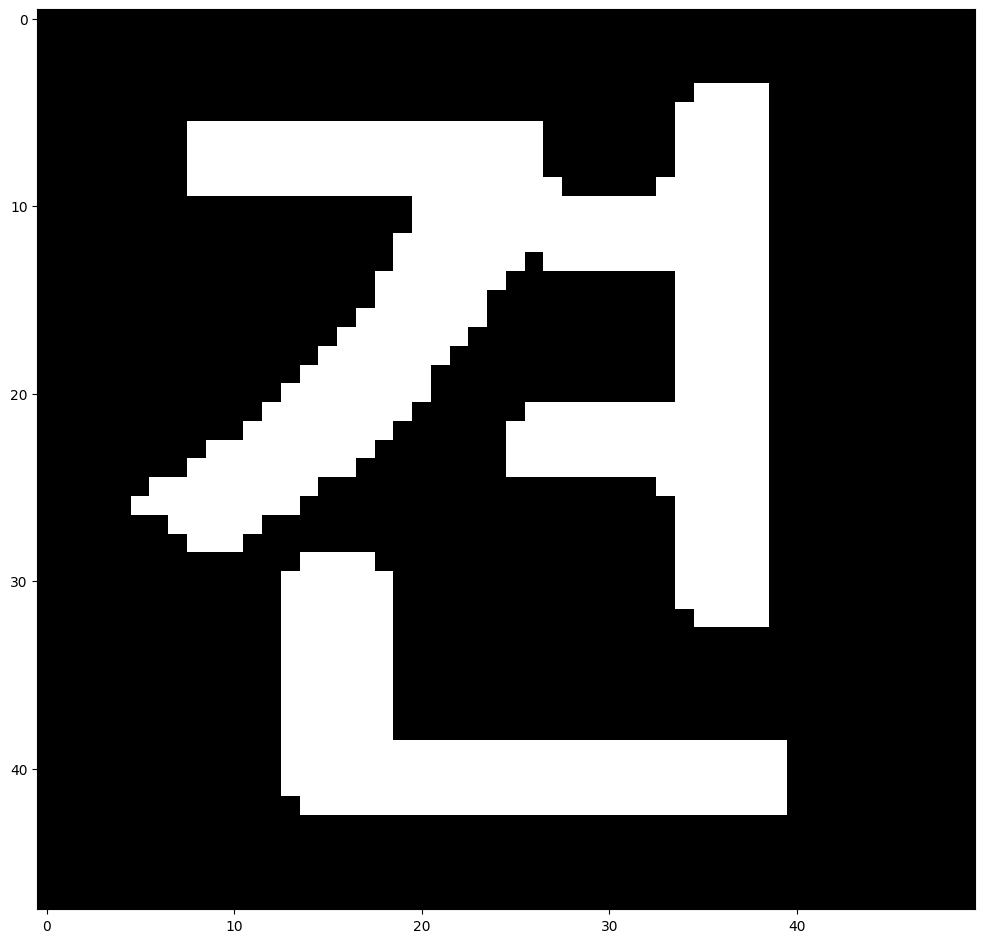

In [44]:
value, thresh = cv2.threshold(kor_img_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
display(thresh)

In [45]:
img = cv2.resize(thresh, (28, 28))

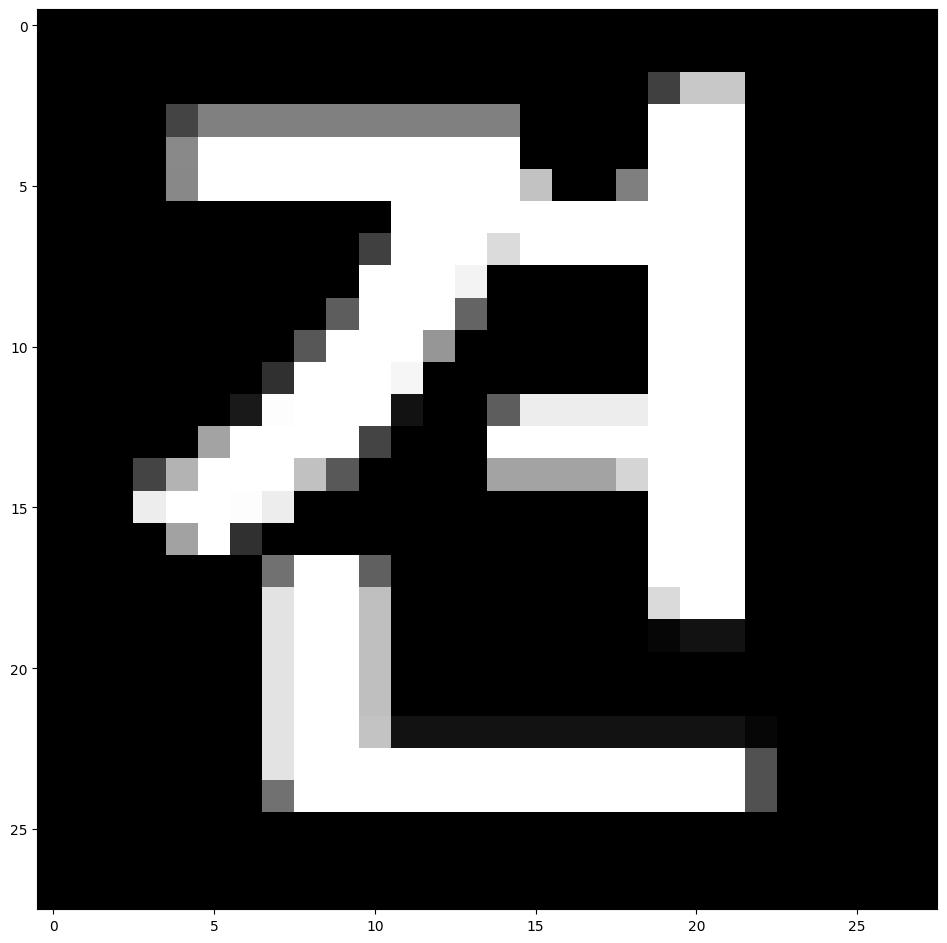

In [46]:

display(img)

In [47]:
img = img.astype('float32') / 255.0
print(img)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.2509804  0.78431374 0.78431374 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.26666668 0.5019608
  0.5019608  0.5019608  0.5019608  0.5019608  0.5019608  0.5019608
  0.5

In [48]:
img = np.reshape(img, (1, 28, 28, 1))
img.shape

(1, 28, 28, 1)

In [49]:
prediction = loaded_network.predict(img)
prediction

1/1 [==============================] - 0s 19ms/step


array([[4.2693578e-06, 1.9202914e-06, 3.7337933e-02, 5.3978828e-04,
        1.6381752e-03, 4.4396731e-09, 2.9752766e-07, 8.1546223e-03,
        5.3892974e-05, 6.7862787e-09, 7.2854800e-06, 2.4329222e-06,
        3.1570904e-04, 9.2290662e-07, 1.3519179e-05, 3.1902457e-17,
        2.3640666e-02, 2.0728506e-02, 2.5870835e-07, 1.9818009e-03,
        8.3854366e-07, 2.7242539e-05, 2.8220469e-03, 3.4602802e-02,
        1.1547016e-05, 6.3661965e-10, 7.8344932e-08, 1.7809582e-05,
        7.1179922e-05, 3.9425092e-03, 4.5868788e-02, 4.4576228e-11,
        1.8935028e-04, 2.7271028e-05, 4.2760119e-04, 8.1756902e-01]],
      dtype=float32)

In [50]:
np.argmax(prediction)

35

In [51]:
name_labels[np.argmax(prediction)]

'Z'

In [ ]:
# Custom OCR - Text Recognition